# Dependencies


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# data loading

In [12]:
data = pd.read_csv("mall customers.csv")

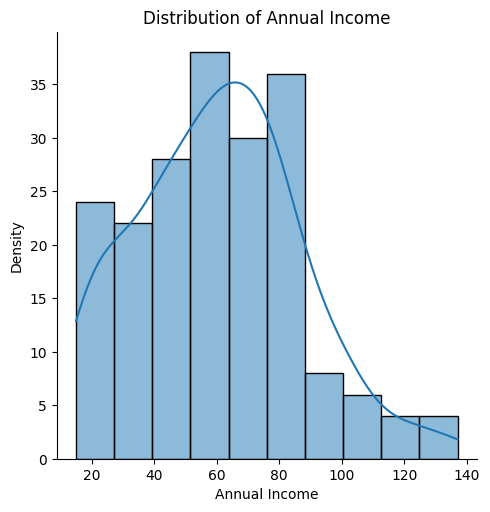

<function matplotlib.pyplot.show(close=None, block=None)>

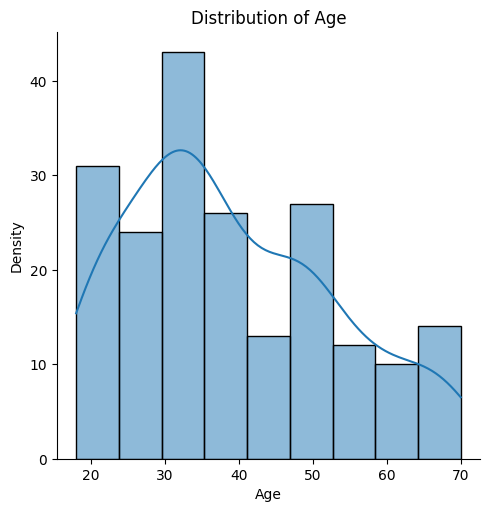

In [13]:

sns.displot(data["Annual Income (k$)"], kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.show()

sns.displot(data["Age"], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show





# Creating 3d plot

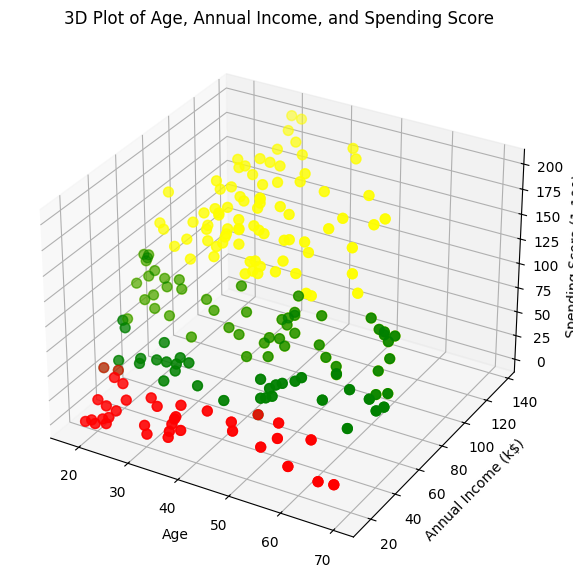

In [14]:

age = data['Age']
annual_income = data['Annual Income (k$)']
spending_score = data['CustomerID']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['red' if score < 34 else 'green' if score < 67 else 'yellow' for score in spending_score]
color = ['red' if score < 34 else 'green' if score < 67 else 'yellow' for score in annual_income]
colo = ['red' if score < 34 else 'green' if score < 67 else 'yellow' for score in age]

ax.scatter(age, annual_income, spending_score, c=colors, s=50)
ax.scatter(age, annual_income, spending_score, c=color, s=50)

ax.set_title('3D Plot of Age, Annual Income, and Spending Score')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()



In [15]:
data.shape

(200, 5)

In [16]:
print(data.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score '], dtype='object')


In [17]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Gender              200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual Income (k$)  200 non-null    int64 
 4   Spending Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
data.isnull().sum ()

CustomerID            0
Gender                0
Age                   0
Annual Income (k$)    0
Spending Score        0
dtype: int64

In [20]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# feature extracting

In [66]:
X = data.iloc[:,[3,4]].values


In [67]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# Calculating WCSS for Various Cluster

In [61]:
wcss = []
for i in range(1,30):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)





# creating elbow graph

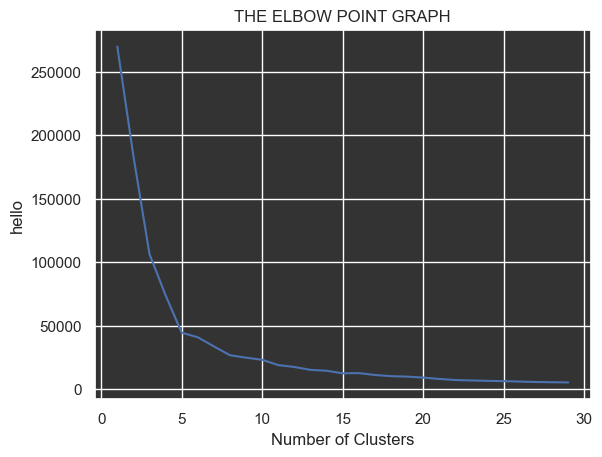

In [25]:
sns.set()
sns.set_style("darkgrid", {"axes.facecolor": ".20"})
plt.plot(range(1,30),wcss)
plt.title("THE ELBOW POINT GRAPH")
plt.xlabel('Number of Clusters')
plt.ylabel('hello')
plt.show()

# Training the model

In [62]:
kmeans = KMeans(n_clusters=5,init="k-means++",random_state=0)
Y = kmeans.fit_predict(X)
print(Y)


[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


# Plotting the clusters

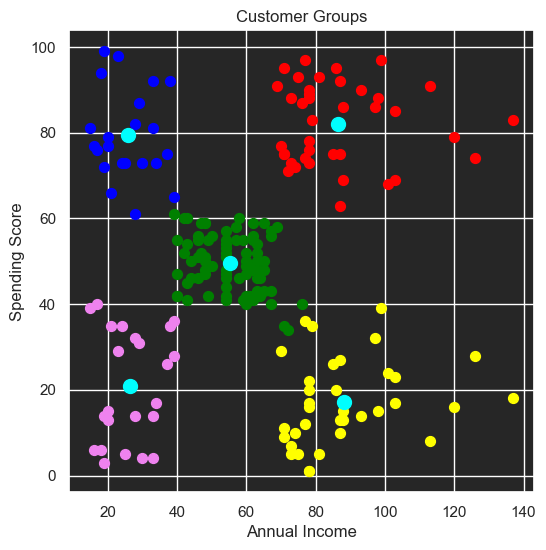

In [63]:
plt.figure(figsize=(6,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')
sns.set_style("darkgrid", {"axes.facecolor": ".15"})

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Predicting the new data set

In [54]:
new_data = np.array([
    [60, 45],  [70, 50], [610, 45],   [832, 55], [106, 65], [870, 55],[6970, 45], [70, 50],[8990, 55]  ]) 


predicted_clusters = kmeans.predict(new_data)
data_points = 1  
for cluster in predicted_clusters:
    print(f'Data point {data_points} belongs to cluster: {cluster}')
    data_points += 1  

Data point 1 belongs to cluster: 0
Data point 2 belongs to cluster: 0
Data point 3 belongs to cluster: 2
Data point 4 belongs to cluster: 2
Data point 5 belongs to cluster: 1
Data point 6 belongs to cluster: 2
Data point 7 belongs to cluster: 2
Data point 8 belongs to cluster: 0
Data point 9 belongs to cluster: 2
